<a href="https://colab.research.google.com/github/anubhab-creator/jobify/blob/main/Data_Analytics_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Machine Failure Prediction with Sensor Data
**Author:** Anubhab Chanda
# New Section
## This notebook presents a full data science workflow to predict machine failures using sensor data. It includes EDA, feature visualization, model training, evaluation, and interpretability using visual storytelling.

## 🎯 Objective
# Build a machine learning model to predict machine failure in advance using sensor readings, aiming to support predictive maintenance systems in real-world scenarios.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data(1).csv')
df.head()


Saving data(1).csv to data(1) (1).csv


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [ ]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [ ]:
df.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


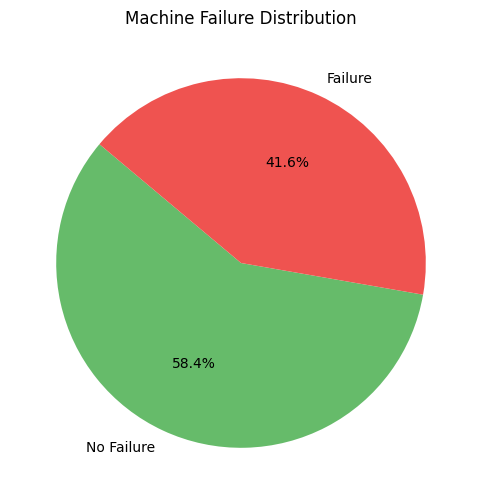

In [ ]:

fail_counts = df['fail'].value_counts()
labels = ['No Failure', 'Failure']
colors = ['#66bb6a', '#ef5350']

plt.figure(figsize=(6, 6))
plt.pie(fail_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Machine Failure Distribution')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
le = LabelEncoder()
df['tempMode'] = le.fit_transform(df['tempMode'])


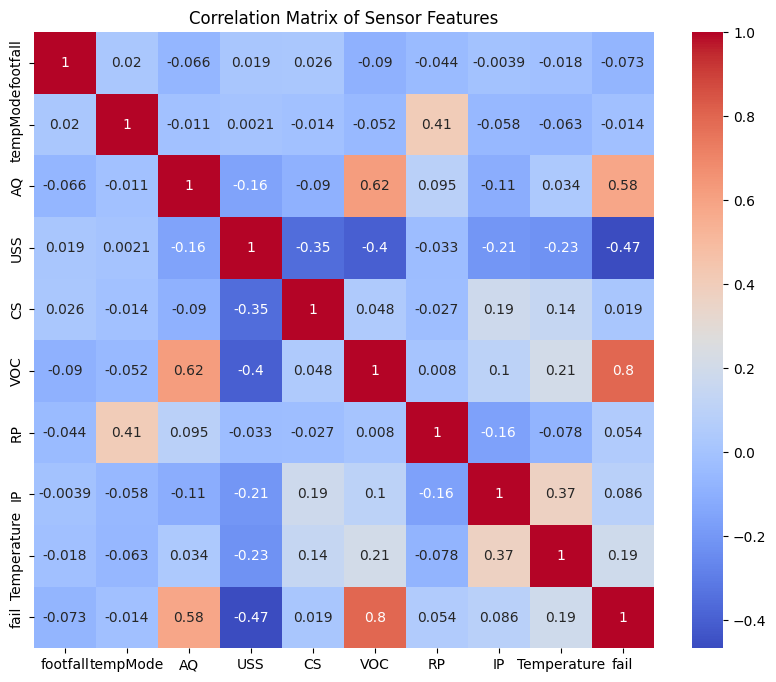

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sensor Features')
plt.show()

### We made a color-coded chart to find out which machine sensors are connected. If two sensors are highly correlated, it means one often changes when the other does. This helps us decide which sensor data is most useful for predicting when a machine might fail

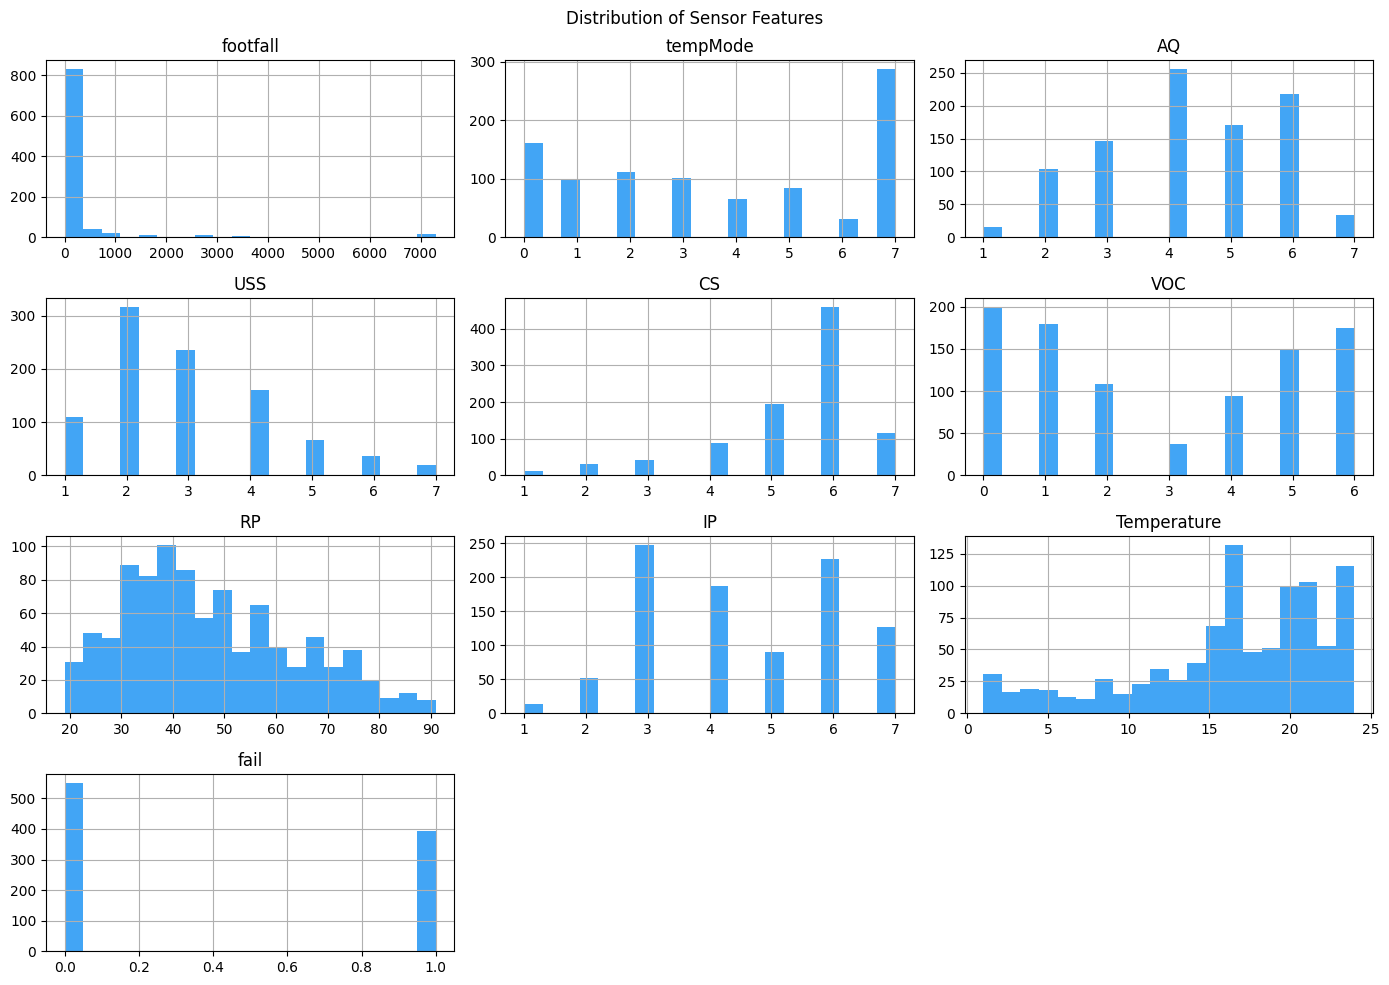

In [ ]:
df.hist(bins=20, figsize=(14, 10), color='#42a5f5')
plt.suptitle('Distribution of Sensor Features')
plt.tight_layout()
plt.show()

### A boxplot shows the range and behavior of sensor readings. It tells us things like what’s the normal range, where the average lies, and whether there are any unusual or extreme values.
### For example, if the temperature readings are much higher when the machine fails, a boxplot will clearly show that difference

/tmp/ipython-input-14-4132569421.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='Temperature', data=df, palette='Set2')


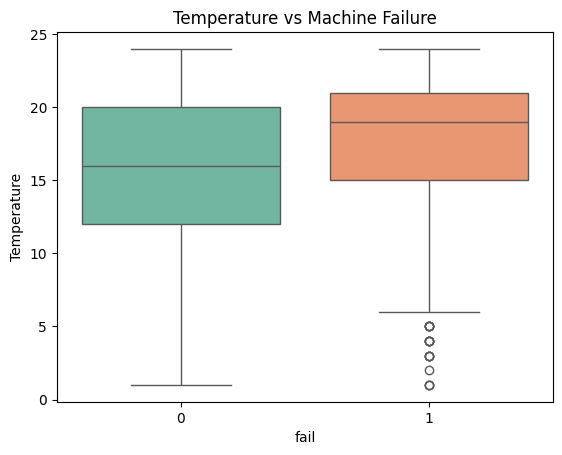

In [ ]:
sns.boxplot(x='fail', y='Temperature', data=df, palette='Set2')
plt.title('Temperature vs Machine Failure')
plt.show()

<Axes: xlabel='fail', ylabel='Temperature'>

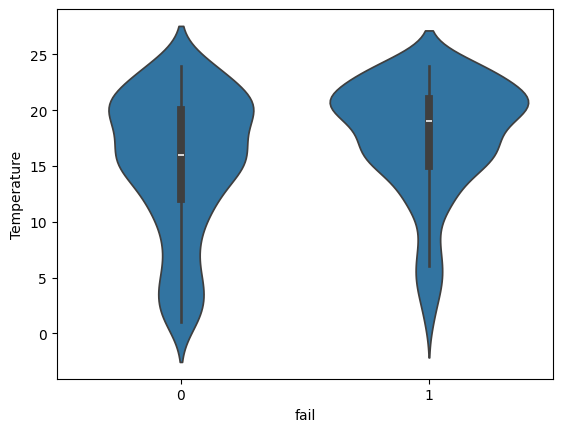

In [ ]:
sns.violinplot(x='fail', y='Temperature', data=df)


/tmp/ipython-input-15-3104124629.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='CS', data=df, palette='Set2')


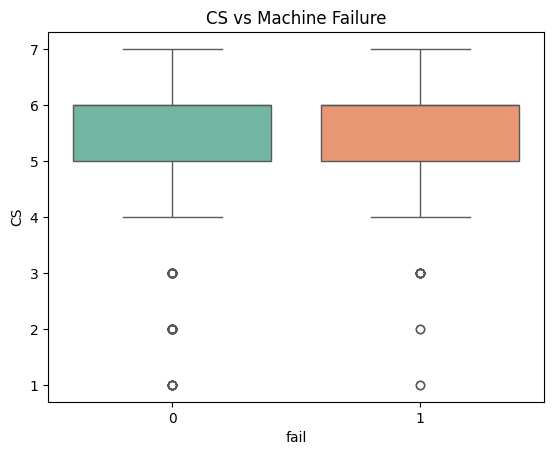

In [ ]:
sns.boxplot(x='fail', y='CS', data=df, palette='Set2')
plt.title('CS vs Machine Failure')
plt.show()

/tmp/ipython-input-16-702009578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='VOC', data=df, palette='Set2')


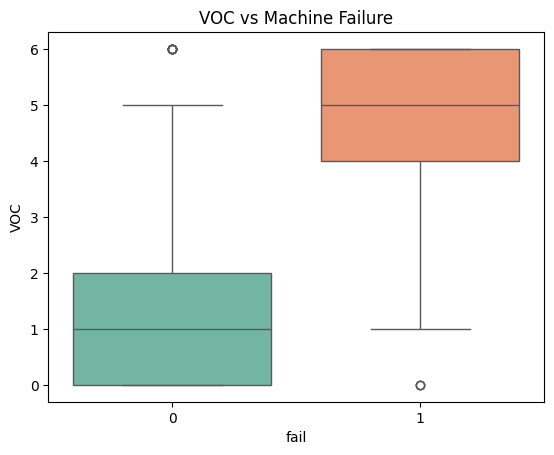

In [ ]:
sns.boxplot(x='fail', y='VOC', data=df, palette='Set2')
plt.title('VOC vs Machine Failure')
plt.show()


/tmp/ipython-input-18-1280567134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='AQ', data=df, palette='Set2')


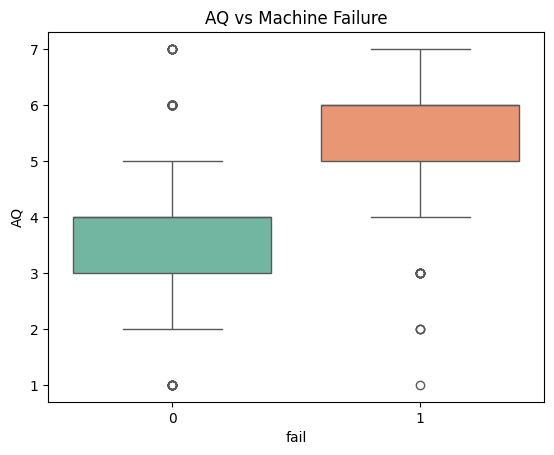

In [ ]:
sns.boxplot(x='fail', y='AQ', data=df, palette='Set2')
plt.title('AQ vs Machine Failure')
plt.show()

/tmp/ipython-input-19-1280567134.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='AQ', data=df, palette='Set2')


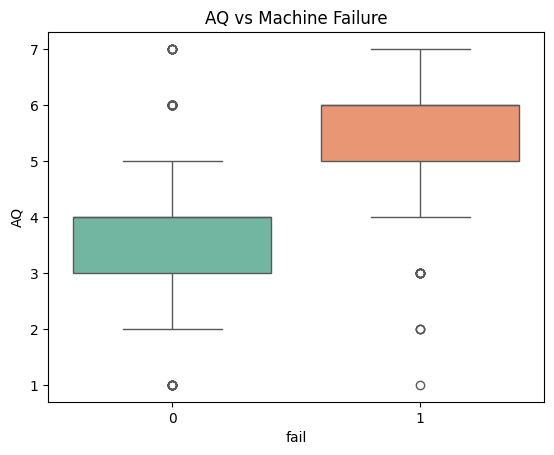

In [ ]:
sns.boxplot(x='fail', y='AQ', data=df, palette='Set2')
plt.title('AQ vs Machine Failure')
plt.show()

/tmp/ipython-input-20-2752717051.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fail', y='footfall', data=df, palette='Set2')


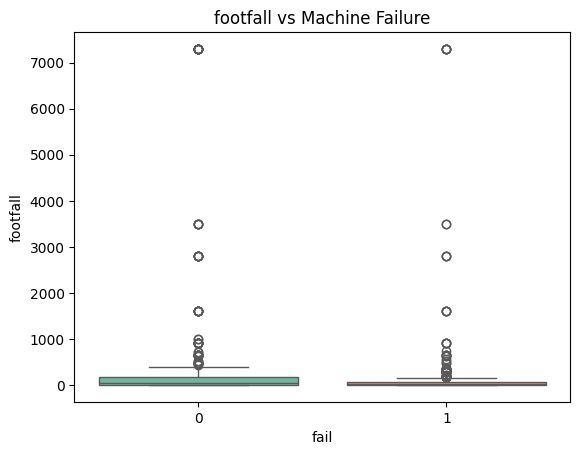

In [ ]:
sns.boxplot(x='fail', y='footfall', data=df, palette='Set2')
plt.title('footfall vs Machine Failure')
plt.show()


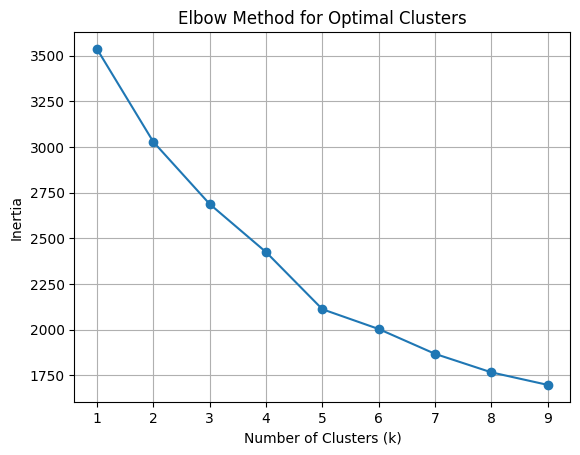

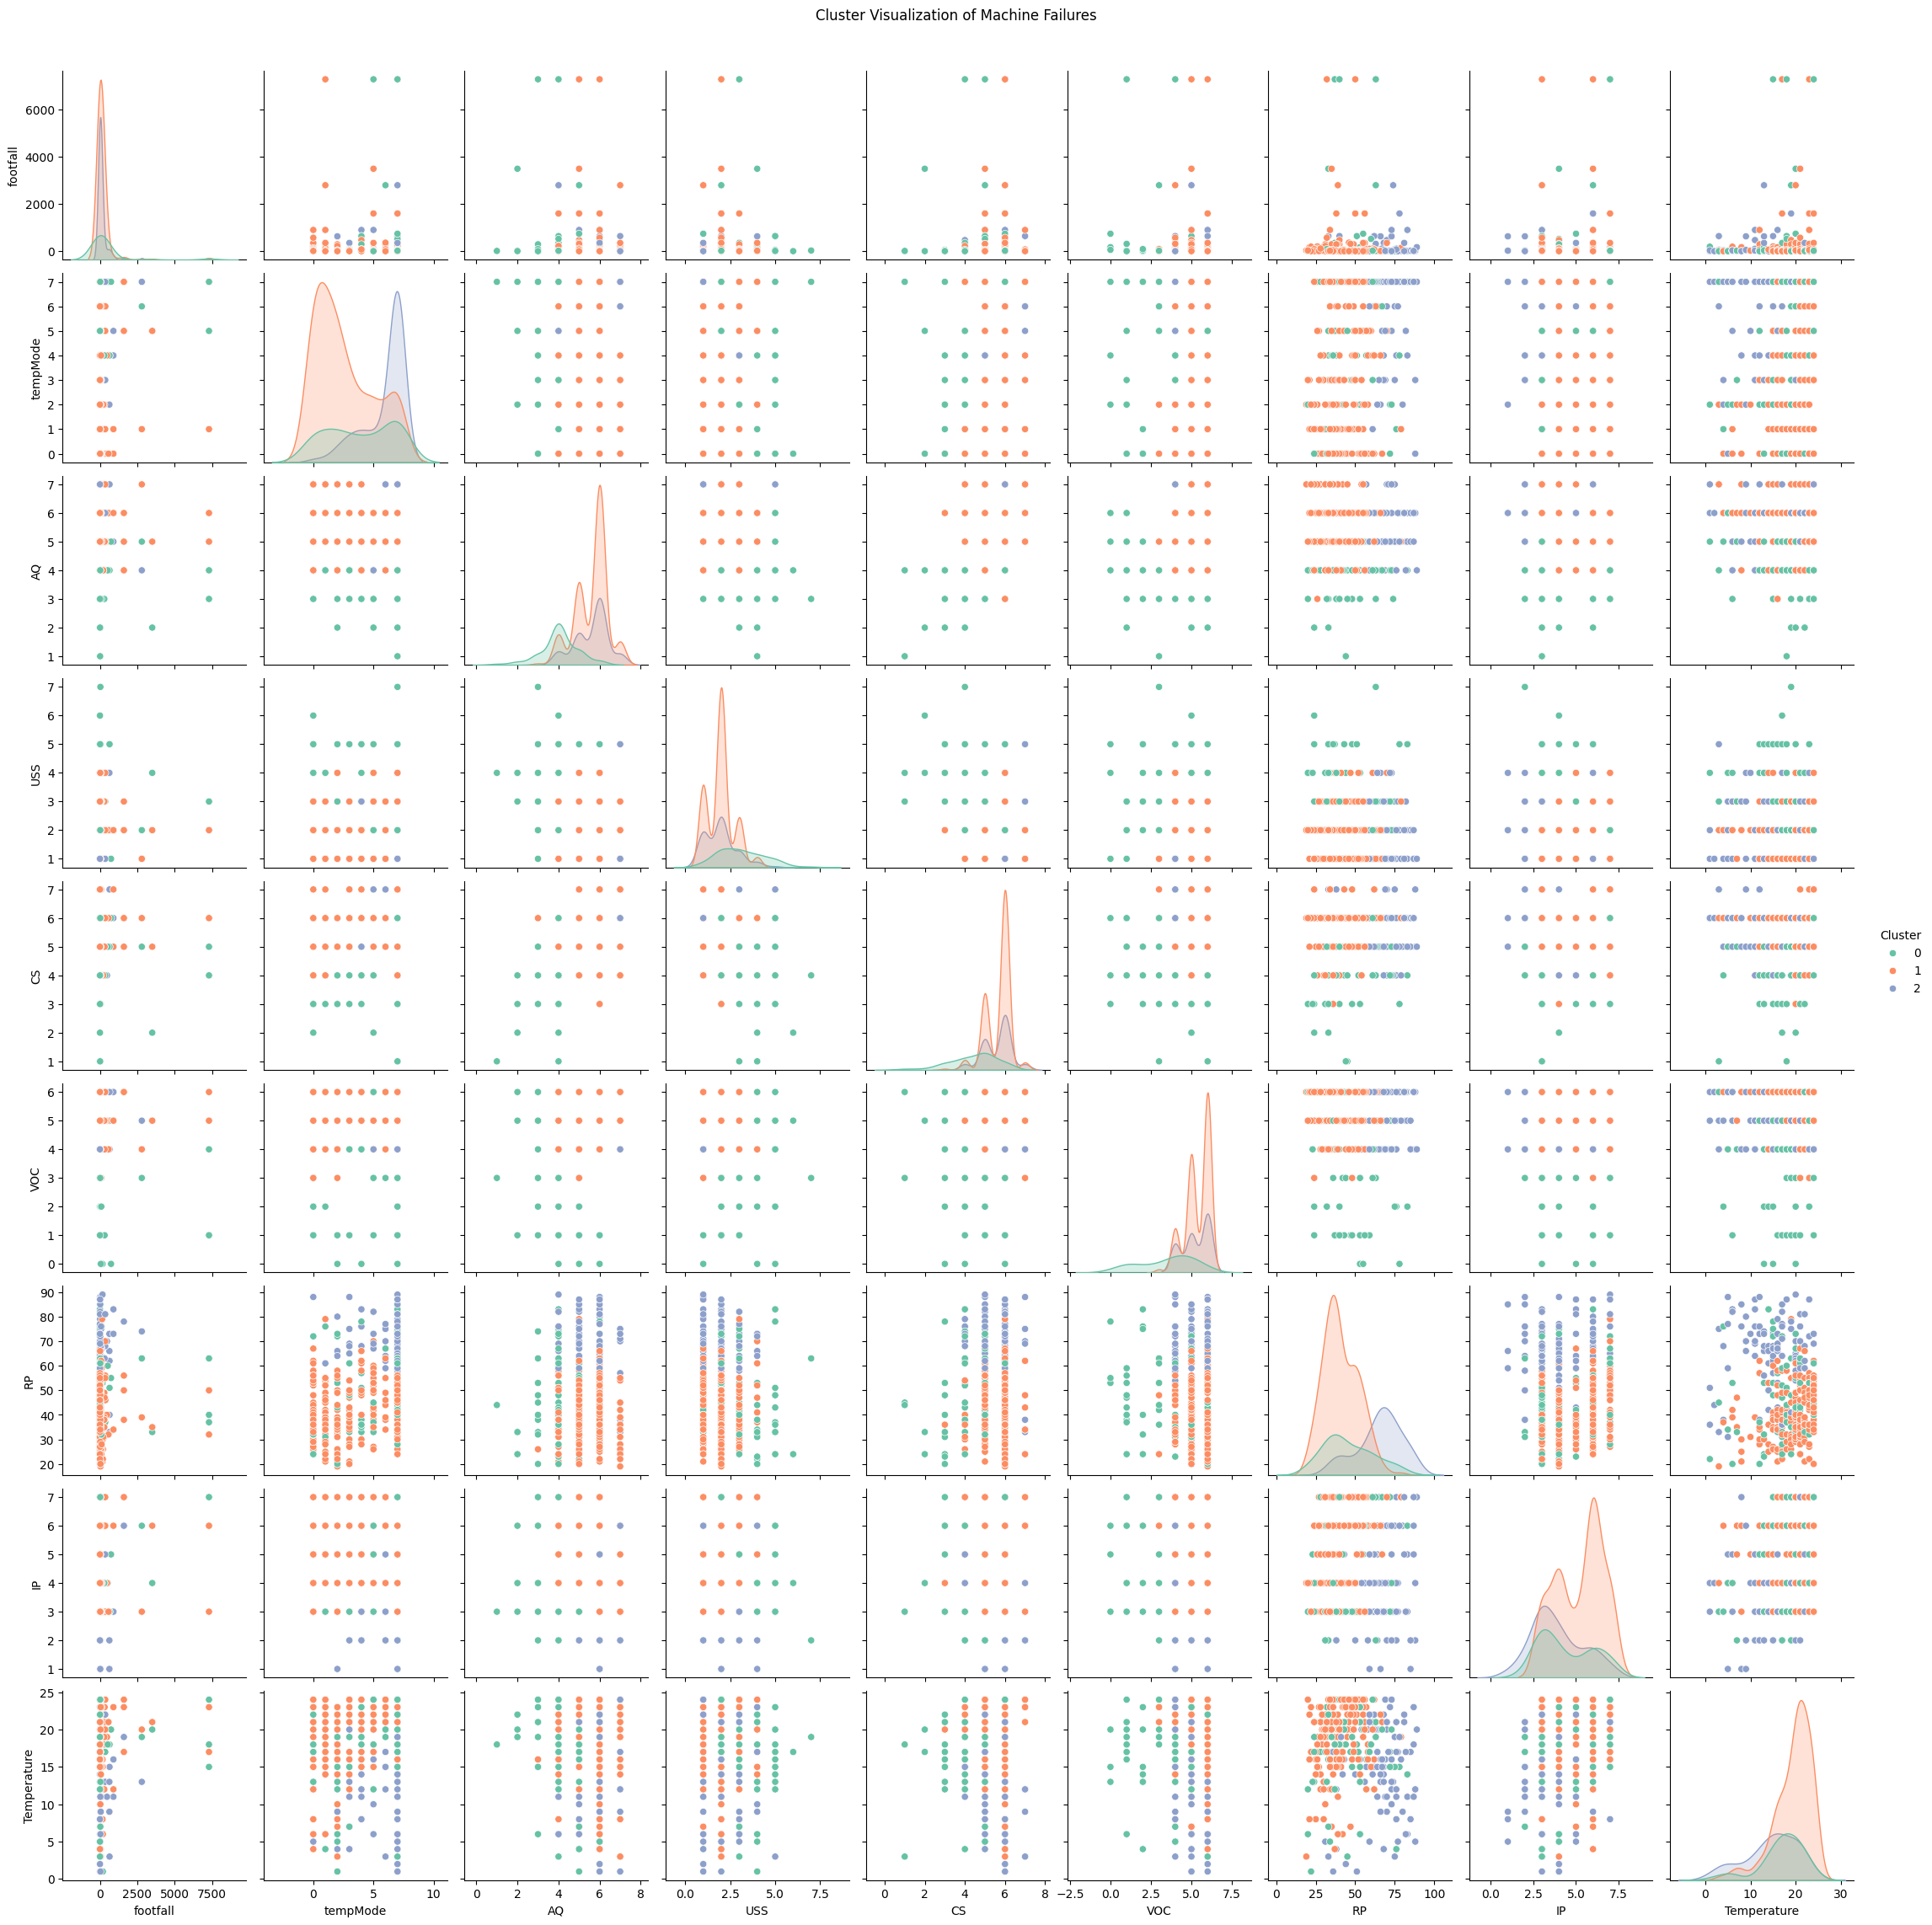

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter only the failure cases
failures = df[df['fail'] == 1].drop('fail', axis=1)

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(failures)

# Step 3: Find optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Step 4: Fit KMeans with optimal number of clusters (let’s say 3 for now)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Step 5: Add cluster labels to your dataframe
failures_clustered = failures.copy()
failures_clustered['Cluster'] = clusters

# Step 6: Visualize clusters using two key features
sns.pairplot(failures_clustered, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Cluster Visualization of Machine Failures", y=1.02)
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('fail', axis=1)
y = df['fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logreg = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {'Logistic Regression': logreg, 'Decision Tree': tree, 'Random Forest': forest}
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score
2,Random Forest,0.883598,0.865169,0.885057,0.875000
0,Logistic Regression,0.867725,0.836957,0.885057,0.860335
1,Decision Tree,0.793651,0.760870,0.804598,0.782123


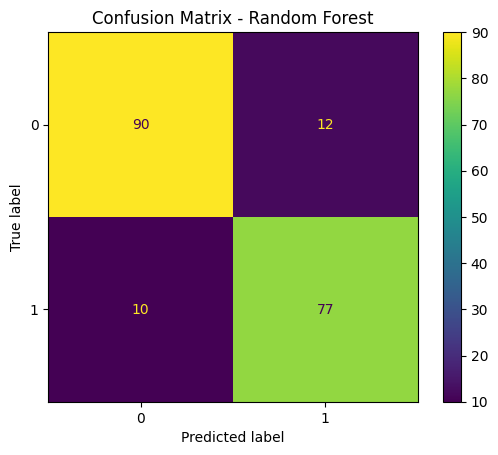

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_rf = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

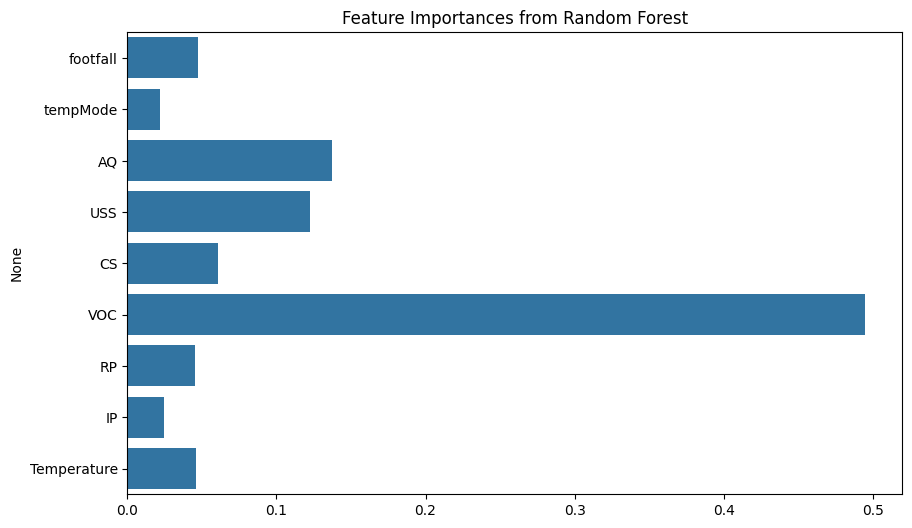

In [ ]:
importances = forest.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances from Random Forest")
plt.show()


In [ ]:
results_df = pd.DataFrame(X_test, columns=X.columns)
results_df['Actual_Fail'] = y_test.values
results_df['Predicted_Fail'] = y_pred_rf
results_df.to_csv('machine_failure_predictions.csv', index=False)